In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
from tensorflow.keras.utils import load_img, img_to_array
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import pandas as pd

In [ ]:
X_DATA_PATH = '/content/drive/MyDrive/Cuoiky/data.pickle'
Y_DATA_PATH = '/content/drive/MyDrive/Cuoiky/data.csv'

In [ ]:
import pandas as pd
y_data = pd.read_csv(Y_DATA_PATH)
y_data.head(None)

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11
0,180,105,146,85,113,119,186,166,186,201,...,100,141,83,114,110,70,118,43,76,83
1,180,104,145,85,114,118,187,165,185,201,...,99,142,82,113,109,70,119,42,76,82
2,179,106,146,84,112,120,186,165,186,202,...,99,141,82,115,110,70,119,42,75,82
3,179,106,147,86,113,120,185,165,187,201,...,100,142,83,113,110,71,117,42,75,82
4,179,106,145,85,112,120,186,166,185,200,...,101,140,83,115,111,69,119,42,76,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,179,88,150,61,109,96,175,145,163,172,...,69,108,42,88,106,36,73,22,37,42
450,178,86,150,61,111,97,173,144,165,173,...,68,107,42,88,106,36,73,22,35,43
451,180,86,150,63,110,96,174,145,165,171,...,69,107,41,88,108,34,73,22,36,42
452,180,86,149,62,109,95,173,144,165,173,...,69,107,43,89,108,34,73,24,37,44


In [ ]:
import glob
import pickle
import numpy as np
x_data = pickle.load(open(X_DATA_PATH, 'rb'))
x_data = np.array(x_data, dtype = 'float32')
x_data /= 255
print('Shape of x data: ', x_data.shape)

Shape of x data:  (454, 250, 250, 3)


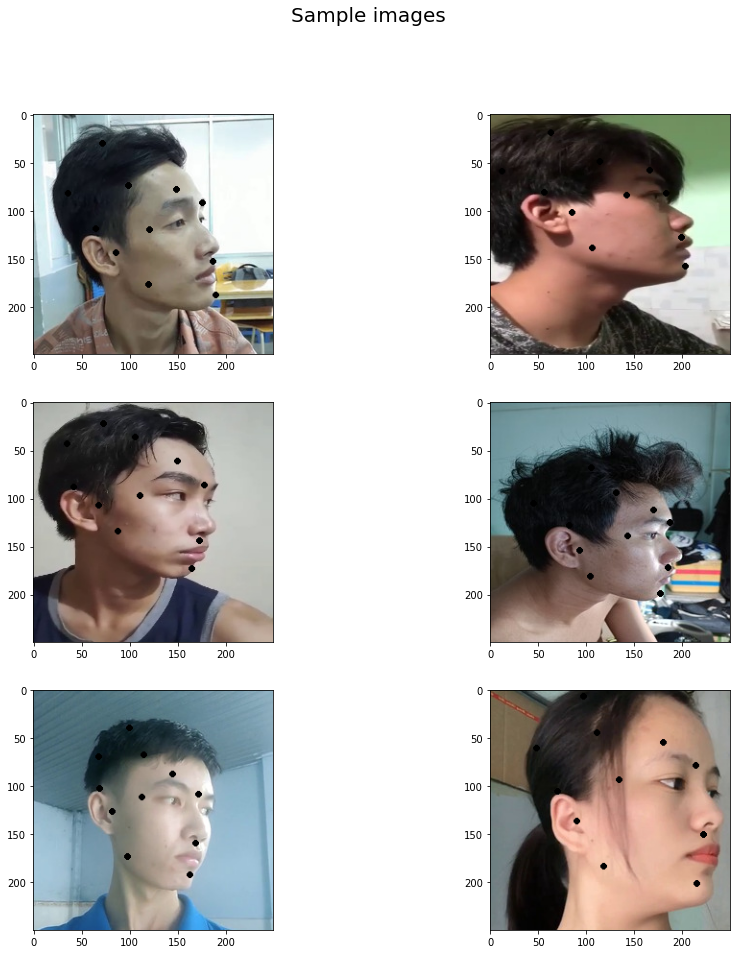

In [ ]:
import matplotlib.pylab as plt
import pandas as pd
import random
import cv2
#n = x_data.shape[0]
plt.figure(figsize = (15, 15))
plt.subplots_adjust(hspace = .2)
for i in range(6):
    plt.subplot(3, 2, i + 1)
    k = random.randint(0, 454)
    img = x_data[k]
    points = list(y_data.iloc[k])
    points = [tuple(points[i : i + 2]) for i in range(0, len(points), 2)]
    for x, y in points:
        cv2.circle(img, (int(x), int(y)), 2, (0, 0, 0), 2)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
_ = plt.suptitle('Sample images', size = 20)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
#x_data = x_data.reshape(-1, (250,250,3), 1)
input_shape = x_data.shape[1:4]
y_data = np.array(y_data, dtype = 'float32')
num_class = y_data.shape[1]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1)
print('Input shape: ', input_shape)
print('Number of output: ', num_class)
print('x train shape: ', x_train.shape)
print('y train shape: ', y_train.shape)
print('x test shape: ', x_test.shape)
print('y test shape: ', y_test.shape)

Input shape:  (250, 250, 3)
Number of output:  22
x train shape:  (408, 250, 250, 3)
y train shape:  (408, 22)
x test shape:  (46, 250, 250, 3)
y test shape:  (46, 22)


In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, MaxPooling2D, Flatten, LeakyReLU, Convolution2D, MaxPool2D
model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape = input_shape))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

# Dense
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
# model.add(Dense(num_class, activation='softmax'))
model.add(Dense(num_class))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      864       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 250, 250, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 64)      18432     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 250, 250, 64)      0         
                                                                 
 batch_normalization_1 (Batc  (None, 250, 250, 64)     256       
 hNormalization)                                        

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
model.compile(
    optimizer = 'Adam',
    loss = "mean_squared_error",
    metrics = ['mae']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor = 'val_mae', patience = 25)
hist = model.fit(x_train, y_train, epochs = 101000, batch_size = 4, validation_split = 0.1).history

Epoch 1/1000
92/92 [==============================] - 22s 111ms/step - loss: 5597.7949 - mae: 51.7883 - val_loss: 11637.7793 - val_mae: 94.0352
Epoch 2/1000
92/92 [==============================] - 9s 94ms/step - loss: 760.8769 - mae: 20.7264 - val_loss: 6561.0396 - val_mae: 69.2651
Epoch 3/1000
92/92 [==============================] - 9s 95ms/step - loss: 187.6524 - mae: 10.6504 - val_loss: 3547.3311 - val_mae: 50.5601
Epoch 4/1000
92/92 [==============================] - 9s 95ms/step - loss: 144.3189 - mae: 9.3872 - val_loss: 1603.8920 - val_mae: 34.0508
Epoch 5/1000
92/92 [==============================] - 9s 95ms/step - loss: 124.3975 - mae: 8.7522 - val_loss: 784.1972 - val_mae: 23.9159
Epoch 6/1000
92/92 [==============================] - 9s 98ms/step - loss: 119.7210 - mae: 8.5355 - val_loss: 980.9329 - val_mae: 27.2454
Epoch 7/1000
92/92 [==============================] - 9s 97ms/step - loss: 145.9500 - mae: 9.4598 - val_loss: 384.9165 - val_mae: 16.2738
Epoch 8/1000
92/92 [===

In [ ]:
final_loss, final_accuracy = model.evaluate(x_test, y_test)
print('Final loss: {:.4f}'.format(final_loss))
print('Final accuracy: {:.4f}'.format(final_accuracy))

2/2 [==============================] - 3s 935ms/step - loss: 4.2542 - mae: 1.5542
Final loss: 4.2542
Final accuracy: 1.5542


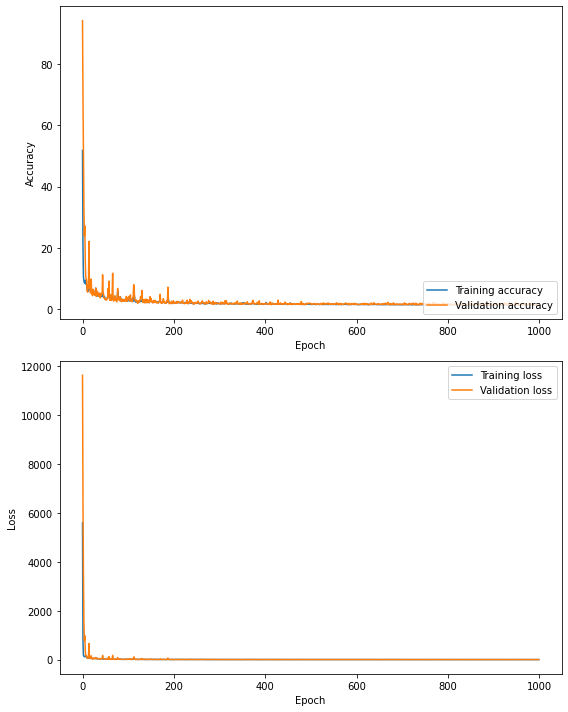

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
model_history = pd.DataFrame(hist)
# add epoch column
model_history['epoch'] = np.arange(1, len(model_history) + 1)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 10))
epochs = model_history.shape[0]
ax1.plot(np.arange(0, epochs), model_history['mae'], label = 'Training accuracy')
ax1.plot(np.arange(0, epochs), model_history['val_mae'], label = 'Validation accuracy')
ax1.legend(loc = 'lower right')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax2.plot(np.arange(0, epochs), model_history['loss'], label = 'Training loss')
ax2.plot(np.arange(0, epochs), model_history['val_loss'], label = 'Validation loss')
ax2.legend(loc = 'upper right')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
plt.tight_layout()
plt.show()

In [ ]:
PATH = '/content/drive/MyDrive/Cuoiky'
MODEL_NAME = "Model_MAE" + str(round(final_accuracy)) + ".h5"
model.save(PATH + MODEL_NAME)

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/CuoikyModel_MAE2.h5')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


28
[206.74294  102.96768  182.0294    81.60713  142.2784   115.4473
 213.94583  161.09938  212.99739  196.7739   123.79408  183.79803
 105.61175  140.61282   82.43884  115.78802  122.40756   69.24081
  96.78377   36.330727  59.97452   72.74719 ]


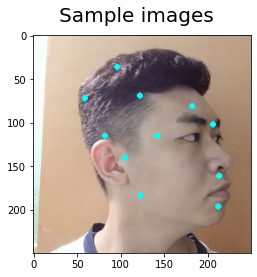

In [ ]:
import matplotlib.pylab as plt
import cv2
pred = model.predict(x_test)
n = x_test.shape[0]
# plt.figure(figsize = (15, 15))
# plt.subplots_adjust(hspace = .2)
#plt.subplot(3, 2, i + 1)
k = random.randint(0, 46)
print(k)
img = x_test[k].reshape(250,250,3)
points = pred[k,:]
#points = [tuple(points[i : i + 2]) for i in range(0, len(points), 2)]
print(points)
for j in range(11):
  cv2.circle(img, (int(points[j*2]), int(points[j*2+1])), 2, (255, 255, 0), 2)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
_ = plt.suptitle('Sample images', size = 20)

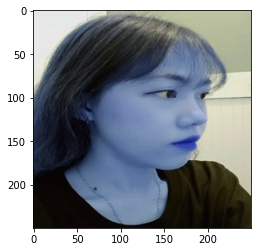

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


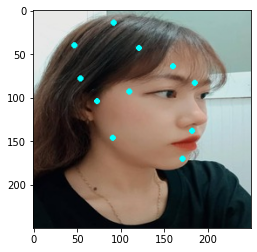

In [ ]:
import matplotlib.pylab as plt
import cv2
path = '/content/Test.jpg'

img_input_test = cv2.imread(path)

# img_input_test = tf.keras.utils.load_img("/content/test.jpg", target_size = (250,250))
plt.imshow(img_input_test,cmap ='gray')
plt.show()
img = tf.keras.utils.img_to_array(img_input_test)
img = img.astype('float32')
img /= 255

pred = model.predict(img.reshape(1,250,250,3))
#print(pred.shape)
points_tt = pred[:]
points_tt = points_tt.reshape(-1)
for j in range(11):
  x = points_tt[2*j]
  x = x.astype('int')
  if x<0:
    x=x*(-1)
  y = points_tt[2*j+1]
  y = y.astype('int')
  if y<0:
    y=y*(-1)
  cv2.circle(img, (x,y) ,2, (255, 255, 0), 2)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
X_DATA_PATH = '/content/drive/MyDrive/Cuoiky/data.pickle'
Y_DATA_PATH = '/content/drive/MyDrive/Cuoiky/data.csv'

y_data = pd.read_csv(Y_DATA_PATH)
y_data.head(None)

x_data = pickle.load(open(X_DATA_PATH, 'rb'))
x_data = np.array(x_data, dtype='float32')
x_data /= 255
print('Shape of x data: ', x_data.shape)


#x_data = x_data.reshape(-1, (250,250,3), 1)
input_shape = x_data.shape[1:4]
y_data = np.array(y_data, dtype='float')
num_class = y_data.shape[1]
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.15)


model = load_model('/content/drive/MyDrive/CuoikyModel_MAE2.h5')

vid = cv2.VideoCapture('/content/18.mp4')

while(True):

    ret, img = vid.read()

    img = cv2.resize(img, (250, 250), fx=0, fy=0,
                     interpolation=cv2.INTER_CUBIC)

    img = img.astype('float32')
    img /= 255

    pred = model.predict(img.reshape(1, 250, 250, 3))
    points = pred[:]
    points = points.reshape(-1)

    for j in range(11):
        x = points[2*j]
        x = x.astype('int')
        if x < 0:
            x = x*(-1)
        y = points[2*j+1]
        y = y.astype('int')
        if y < 0:
            y = y*(-1)

        cv2.circle(img, (x, y), 2, (255, 0, 0), 2)

    cv2.imshow('frame', cv2.resize(img, (250, 250), fx=0, fy=0,
                                   interpolation=cv2.INTER_CUBIC))

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()


Shape of x data:  (454, 250, 250, 3)
